In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk

In [2]:
# target = lk.search_lightcurve('TIC 159449703').download().select_flux('sap_flux').remove_nans()

In [3]:
target = lk.read('tess2019198215352-s0014-0000000159449703-0150-s_lc.fits').select_flux('sap_flux').remove_nans()

<IPython.core.display.Javascript object>


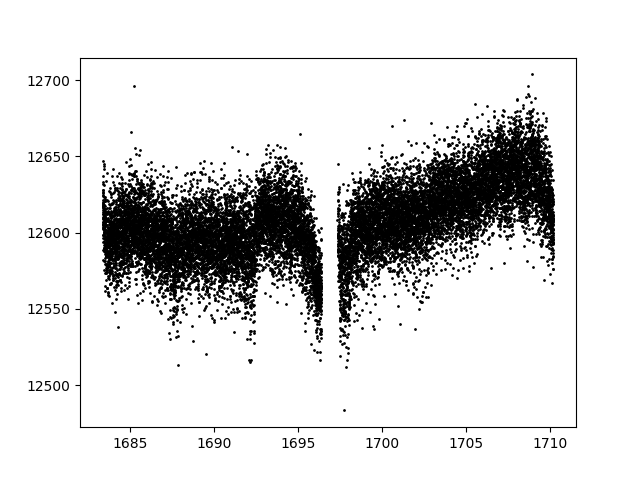

In [4]:
%matplotlib notebook
plt.plot(target.time.value, target.flux.value, 'k.', ms=2)

In [5]:
cbvc = lk.correctors.CBVCorrector(target)

In [6]:
cbvc.cbvs

[TESS CBVs, Sector.Camera.CCD : 14.2.3, CBVType : SingleScale, nCBVS : 16,
 TESS CBVs, Sector.Camera.CCD : 14.2.3, CBVType.Band: MultiScale.1, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 14.2.3, CBVType.Band: MultiScale.2, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 14.2.3, CBVType.Band: MultiScale.3, nCBVs : 8,
 TESS CBVs, Sector.Camera.CCD : 14.2.3, CBVType : Spike, nCBVS : 5]

<IPython.core.display.Javascript object>


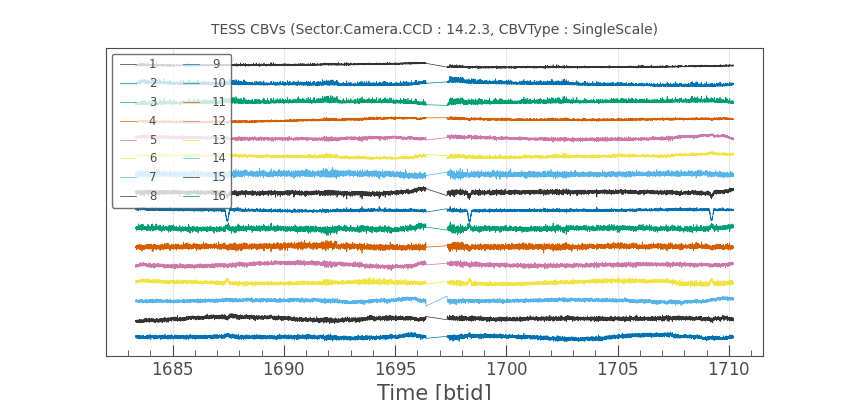

<AxesSubplot:title={'center':'TESS CBVs (Sector.Camera.CCD : 14.2.3, CBVType : SingleScale)'}, xlabel='Time [btjd]'>

In [7]:
cbvc.cbvs[0].plot()

In [8]:
cbv_type = ['SingleScale', 'Spike']
cbv_indices = [np.arange(1,9), 'ALL']

/home/isy/.local/lib/python3.10/site-packages/lightkurve/lightcurve.py:1069: LightkurveWarning: The light curve has a negative median flux (-4.33e+01 electron / s); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(


Optimized Over-fitting metric: 0.9994534115568342
Optimized Under-fitting metric: 0.8051441664549914
Optimized Alpha: 9.858e+03


<IPython.core.display.Javascript object>


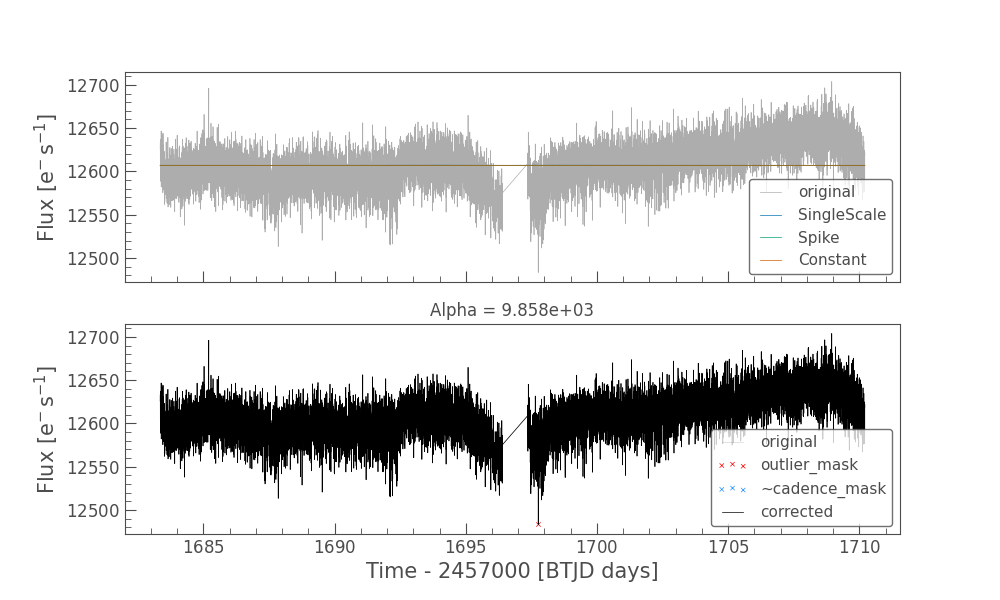

array([<AxesSubplot:ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>,
       <AxesSubplot:title={'center':'Alpha = 9.858e+03'}, xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>],
      dtype=object)

In [11]:
cbvc.correct(cbv_type=cbv_type, cbv_indices=cbv_indices, target_over_score=0.9, target_under_score=0.5)
cbvc.diagnose()

In [10]:
# %matplotlib notebook
# target.plot(marker='.', lw=0)